![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

# Extracting Key Insights

In [2]:
# Re-run this cell 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()
schools.shape

(375, 7)

- ## **Which NYC schools have the best math results?**

In [3]:
# Filter schools with average math scores greater than 640
high_math_schools = schools[schools["average_math"] > 640]

# Select relevant columns and sort by average math scores in descending order
best_math_schools = high_math_schools[["school_name", "average_math"]].sort_values("average_math", ascending=False)

# Display the top schools with the best math results
best_math_schools.head()

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683


- ## **Top 10 performing schools based on the combined SAT scores**

                                           school_name  total_SAT
88                              Stuyvesant High School       2144
170                       Bronx High School of Science       2041
93                 Staten Island Technical High School       2041
174  High School of American Studies at Lehman College       2013
333                        Townsend Harris High School       1981
365  Queens High School for the Sciences at York Co...       1947
5                       Bard High School Early College       1914
280                     Brooklyn Technical High School       1896
45                       Eleanor Roosevelt High School       1889
68   High School for Mathematics, Science, and Engi...       1889


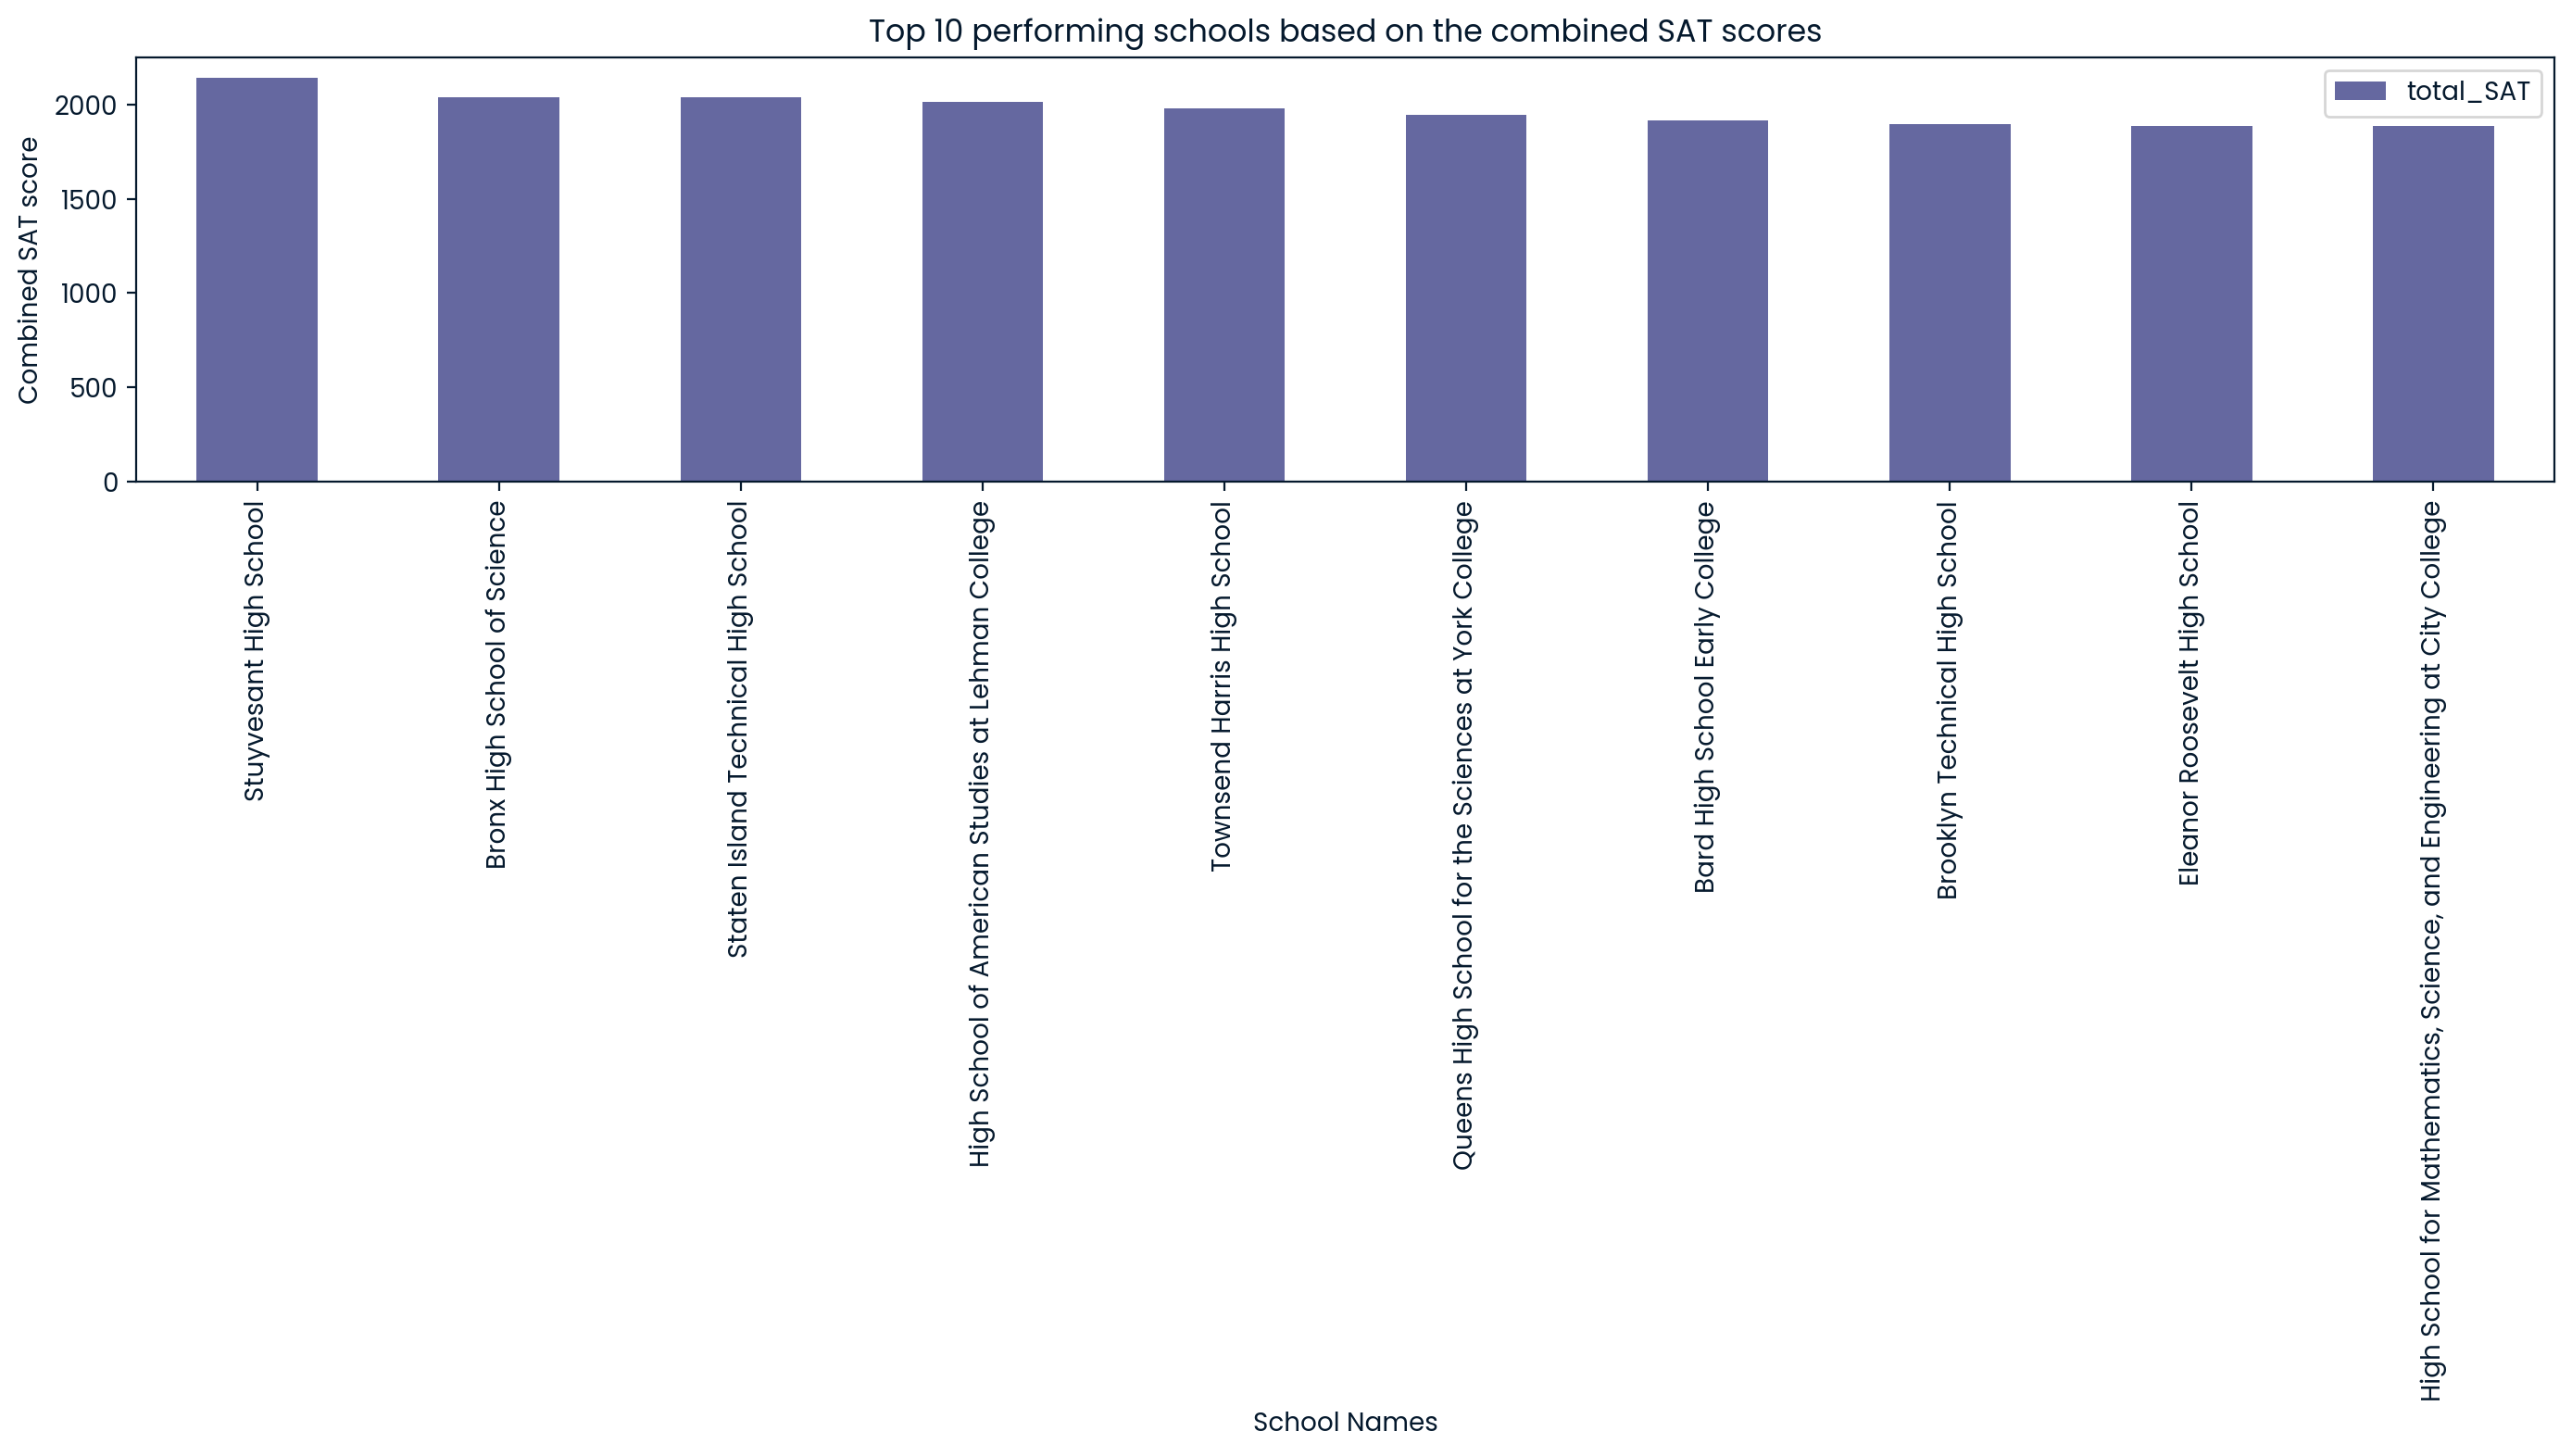

In [4]:
# Calculate the total SAT score by summing the average math, reading, and writing scores
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]

# Select relevant columns and sort schools by total SAT scores in descending order
top_schools = schools[["school_name", "total_SAT"]].sort_values("total_SAT", ascending=False)

# Select the top 10 performing schools based on the total SAT scores
top_10_schools = top_schools.iloc[0:10, :]

# Display the top 10 performing schools
print(top_10_schools)

top_10_schools.set_index("school_name", inplace=True)
top_10_schools.plot(kind="bar",figsize=(14,8))
plt.title("Top 10 performing schools based on the combined SAT scores")
plt.xlabel("School Names")
plt.ylabel("Combined SAT score")
plt.tight_layout()
plt.show()

- ## **Which single borough has the largest standard deviation in the combined SAT score?**

In [5]:
# Calculate the number of schools in each borough
num_schools = schools["borough"].value_counts().reset_index()

# Calculate the standard deviation of total SAT scores for each borough
borough_std_SAT = schools.groupby("borough")["total_SAT"].std().reset_index()

# Identify the borough with the largest standard deviation in total SAT scores
borough = borough_std_SAT.loc[borough_std_SAT["total_SAT"].idxmax(), "borough"]

# Calculate the average and standard deviation of total SAT scores for the identified borough
borough_avg_SAT = schools[schools["borough"] == borough]["total_SAT"].mean().round(2)
std_SAT = schools[schools["borough"] == borough]["total_SAT"].std().round(2)

# Create a DataFrame to display the results
largest_std_dev = pd.DataFrame({
    "borough": [borough],
    "num_schools": [num_schools.loc[num_schools['index'] == borough, 'borough'].values[0]],
    "average_SAT": [borough_avg_SAT],
    "std_SAT": [std_SAT]
})

# Display the DataFrame
largest_std_dev.head()

,borough,num_schools,average_SAT,std_SAT
0,Manhattan,89,1340.13,230.29


- ## **Average Performance by Borough**

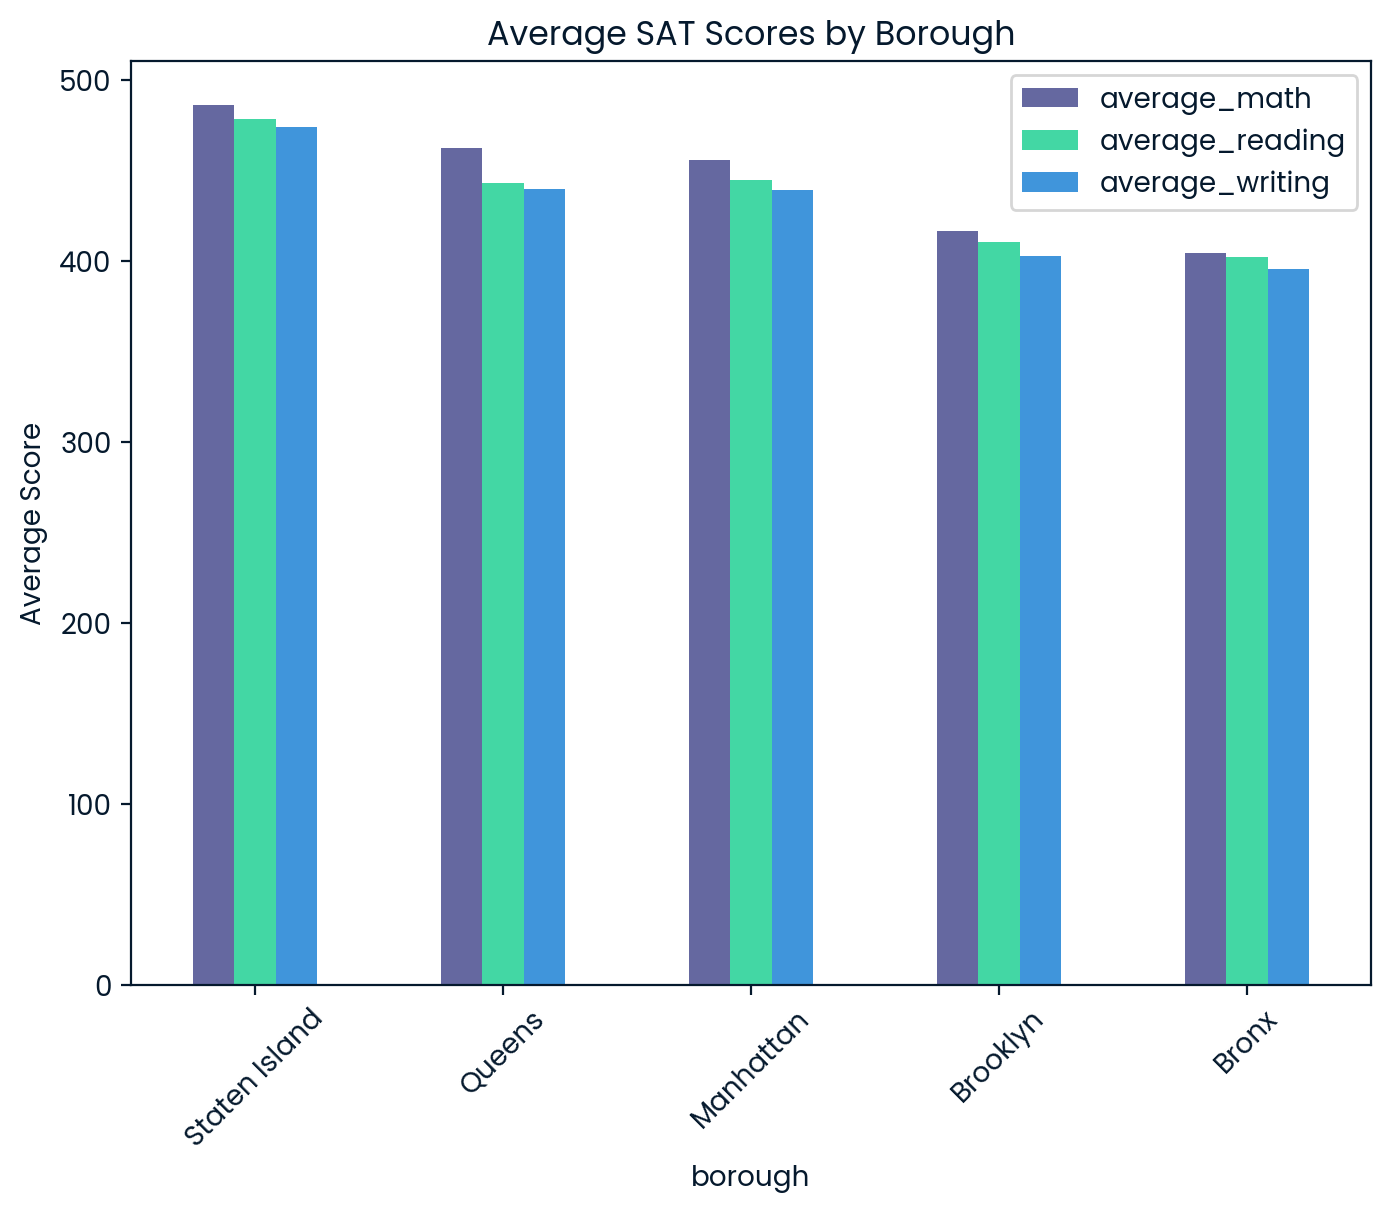

In [6]:
# Average performance by borough
borough_avg= schools.groupby("borough")[["average_math", 'average_reading', 'average_writing']].mean().round(2)
borough_avg= borough_avg.sort_values(by="average_math",ascending=False)

# Visualize
borough_avg.plot(kind="bar", figsize=(8,6))
plt.title("Average SAT Scores by Borough")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.show()

- ## **Correlation Between Subjects (Math vs Reading/Writing)**

                 average_math  average_reading  average_writing
average_math         1.000000         0.928239         0.934155
average_reading      0.928239         1.000000         0.985439
average_writing      0.934155         0.985439         1.000000


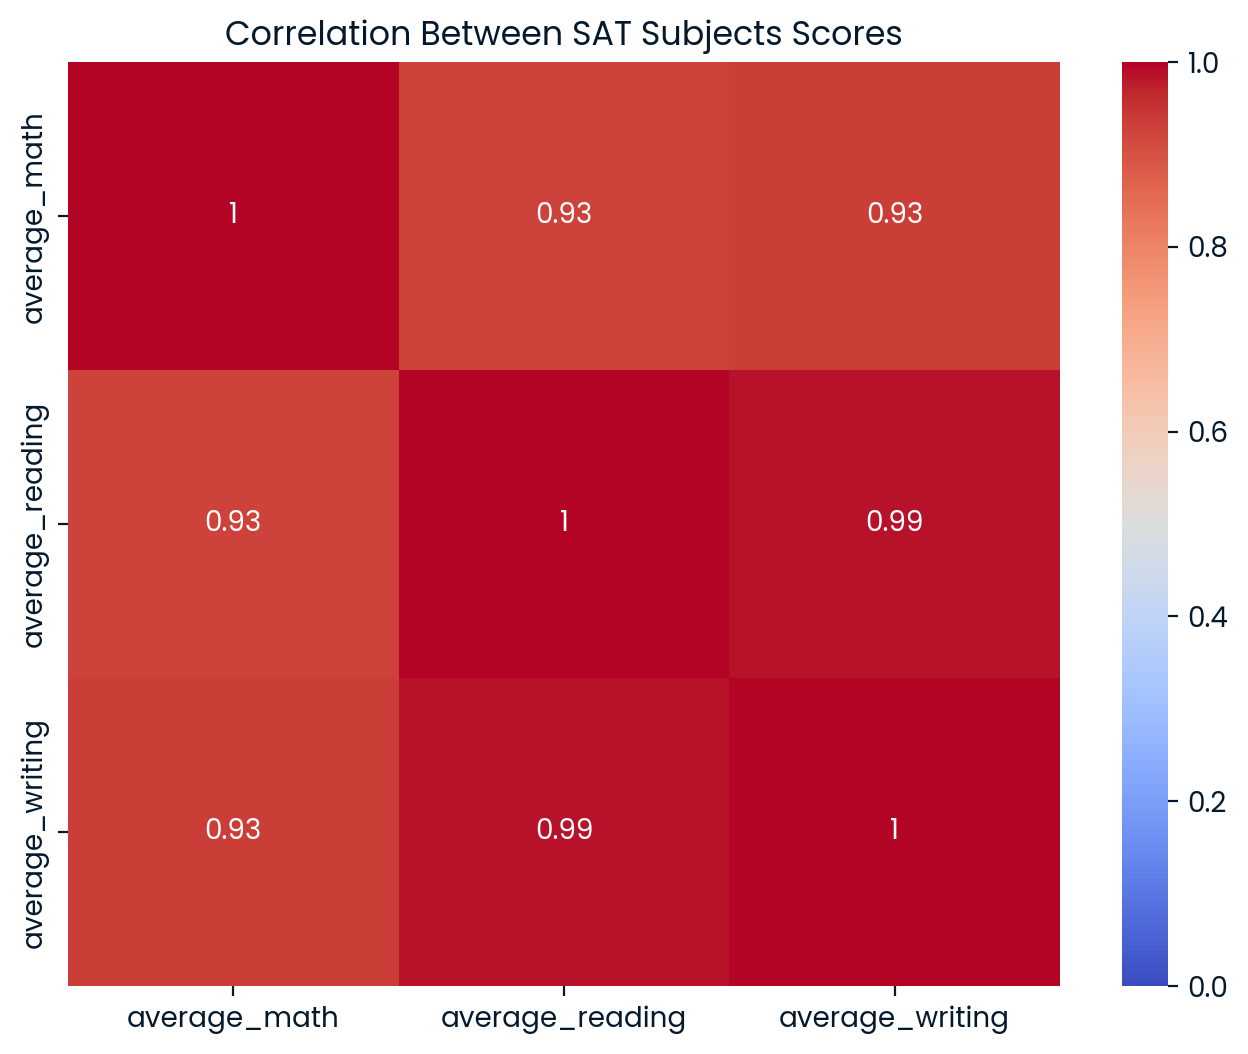

In [7]:
# Correlation between math, reading, and writing
score_corr=schools[['average_math', 'average_reading', 'average_writing']].corr()
# Display correlation matrix
print(score_corr)

#Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(score_corr, annot=True, cmap= "coolwarm", vmin=0,vmax=1)
plt.title("Correlation Between SAT Subjects Scores")
plt.show()

Interpretation of Heatmap:
The correlation analysis shows **very strong positive relationships** between all three SAT subject scores:

- Math & Reading: 0.93 correlation
- Math & Writing: 0.93 correlation
- Reading & Writing: 0.99 correlation

This means students who perform well in one subject are highly likely to perform well in the others. The _near-perfect correlation_ between reading and writing suggests these skills are closely linked, while math performance is also strongly connected, indicating overall academic ability may influence scores across all subjects.

- ##  **Participation Rate Impact.**

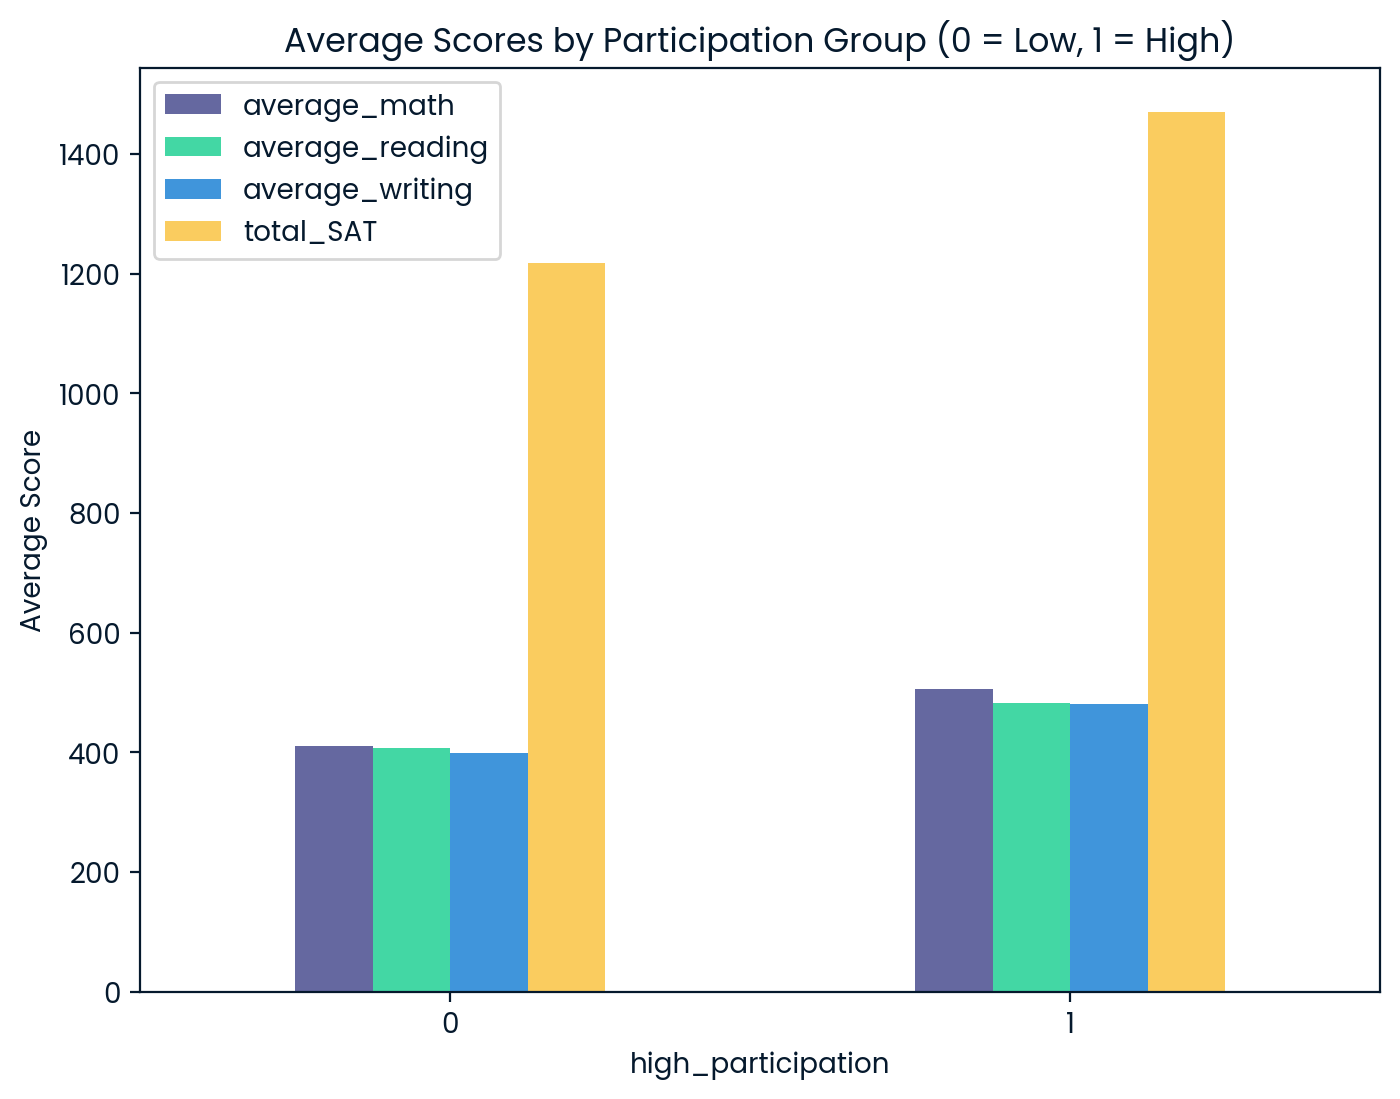

In [8]:
schools["high_participation"] = (schools["percent_tested"] >= 80).astype(int)
grouped=schools.groupby("high_participation")[["average_math", 'average_reading', 'average_writing',"total_SAT"]].mean().round(2)

counts = schools['high_participation'].value_counts().sort_index()

grouped.plot(kind="bar", figsize=(8,6))
plt.title("Average Scores by Participation Group (0 = Low, 1 = High)")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()

Interpretation:
Schools with **high participation rates (≥80%)** consistently outperformed low-participation schools across all subjects. On average, high-participation schools scored about **80–100 points higher per subject** and nearly **300 points higher in total SAT scores**. This suggests that _greater student participation may be linked to stronger academic performance_, though further analysis would be needed to confirm causality.

- ## **Distribution of Combined SAT Scores**

This helps identify whether most schools cluster around a certain score range or if there’s a wide spread with many high/low performers.

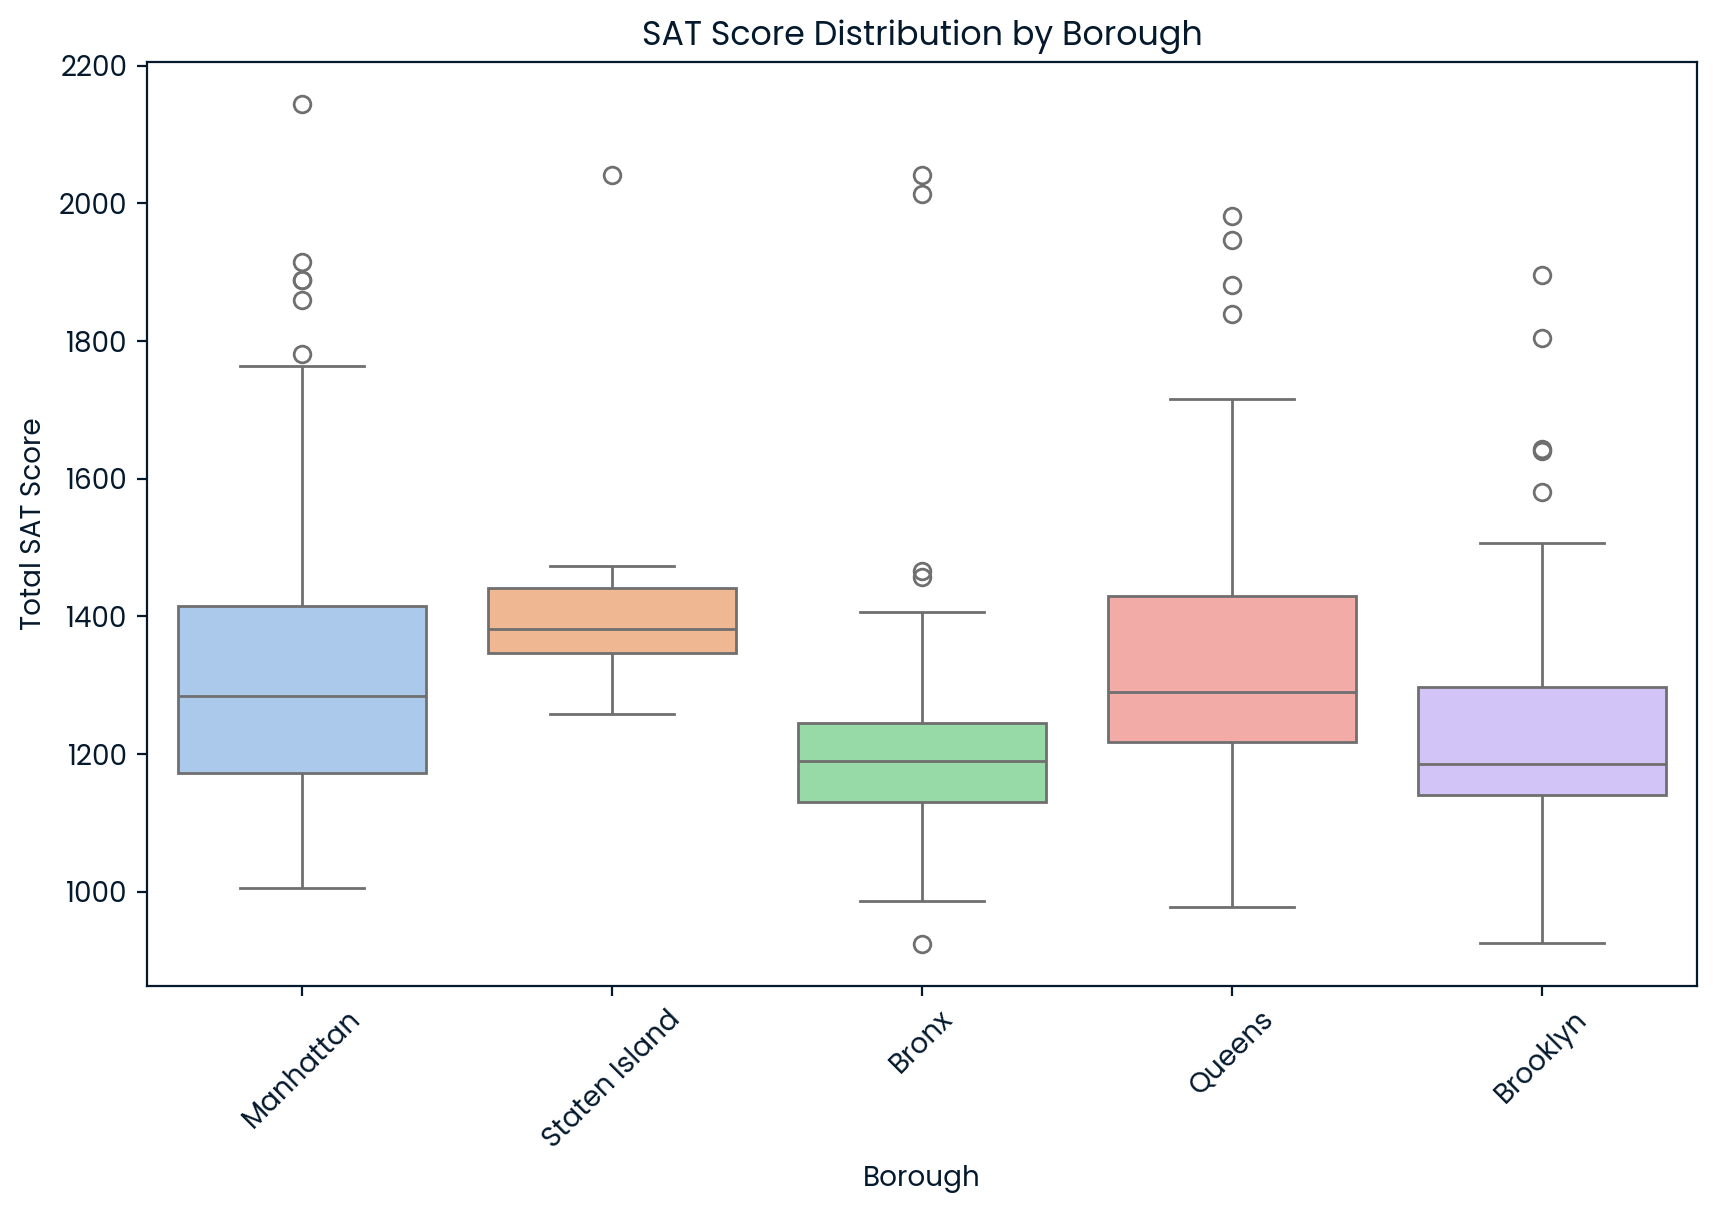

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='borough', y='total_SAT', data=schools, palette='pastel')
plt.ylabel("Total SAT Score")
plt.xlabel("Borough")
plt.title("SAT Score Distribution by Borough")
plt.xticks(rotation=45)
plt.show()

Interpretation:
The box plot reveals that _Staten Island leads with the highest and most consistent SAT scores_, while the Bronx shows the lowest median performance. Manhattan displays the widest score variation, indicating both very high and low performers. All boroughs have high-scoring outliers, with **Manhattan and Queens showing more frequent top scorers.**

# Predicting High Student Test Participation in NYC Public Schools 

The goal of this project is to predict whether a New York City public school has high student test participation (≥80%) based on average test scores, borough, and building information
This problem is important for identifying schools with low participation and taking targeted interventions to improve student engagement.

## Data Preprocessing


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

1) Load

In [6]:
df = pd.read_csv('schools.csv')
print("Rows, Columns:", df.shape)
display(df.head())
display(df.info())
display(df.describe(include='all'))

Rows, Columns: (375, 7)


,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


None

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
count,375,375,375,375.000000,375.000000,375.000000,355.000000
unique,375,5,233,NaN,NaN,NaN,NaN
top,"New Explorations into Science, Technology and ...",Brooklyn,X425,NaN,NaN,NaN,NaN
freq,1,109,6,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,432.944000,424.504000,418.458667,64.976338
std,NaN,NaN,NaN,71.952373,61.881069,64.548599,18.747634
min,NaN,NaN,NaN,317.000000,302.000000,284.000000,18.500000
25%,NaN,NaN,NaN,386.000000,386.000000,382.000000,50.950000
50%,NaN,NaN,NaN,415.000000,413.000000,403.000000,64.800000
75%,NaN,NaN,NaN,458.500000,445.000000,437.500000,79.600000


2) Clean & convert percent_tested if it's stored like "85%"

In [14]:
if df["percent_tested"].dtype == object :
    df["percent_tested"]= df["percent_tested"].astype(str).str.replace("&"," ")
    df["percent_tested"]= pd.to_numeric(df["percent_tested"],errors = "coerce")

3) Create binary target for high participation (>= 80%)

In [7]:
df["high_participation"] = (df["percent_tested"] >= 80).astype(int) 
# 1 =True= High participation (≥80%)
# 0 =False= Low participation (<80%)
df = df[~df['high_participation'].isna()]

4) Handle missing numeric values using median imputation


In [8]:
num_cols=['average_math', 'average_reading', 'average_writing', 'percent_tested']
numeric_features= [c for c in num_cols if c in df.columns]
imputer= SimpleImputer(strategy="median")
df[numeric_features] = imputer.fit_transform(df[numeric_features])

5) Encode categorical features

- **Borough:** Low-cardinality → one-hot encoded with pd.get_dummies() to create binary columns for each borough. Dropped the original column.

- **Building Code:** High-cardinality (233 unique values) → applied frequency encoding to replace each code with its occurrence frequency, avoiding too many sparse columns.

This ensures the model can process categorical data efficiently without losing important information.

In [9]:
# Borough - low-cardinality -> one-hot
if 'borough' in df.columns:
    df['borough'] = df['borough'].astype(str).str.strip()
    borough_dummies = pd.get_dummies(df['borough'], prefix='borough', dummy_na=False)
    df = pd.concat([df, borough_dummies], axis=1)
    df.drop(columns=['borough'], inplace=True)

# building_code - may have many values -> label encode (or drop if too noisy)
if 'building_code' in df.columns:
    df['building_code'] = df['building_code'].astype(str).str.strip()
    # If building_code has too many unique values, consider frequency encoding or dropping.
    n_unique_building = df['building_code'].nunique()
    print("Unique building_code values:", n_unique_building)
    if n_unique_building <= 100:  # reasonable threshold
        le = LabelEncoder()
        df['building_code_encoded'] = le.fit_transform(df['building_code'])
        df.drop(columns=['building_code'], inplace=True)
    else:
        # frequency encoding (safer for high cardinality)
        freq = df['building_code'].value_counts(normalize=True)
        df['building_code_freq'] = df['building_code'].map(freq)
        df.drop(columns=['building_code'], inplace=True)

Unique building_code values: 233


## Building the model

1) Train-Test Split

- Removed non-predictive identifiers (school_name).
- Stratified train-test split (80/20) to maintain class balance.

In [10]:
# Drop identifiers / text columns that are not useful
drop_cols=["school_name"] if "school_name" is df.columns else []
X= df.drop(columns=drop_cols + ['high_participation', 'percent_tested'])
Y=df["high_participation"]

# Train/eval split (stratify to keep class balance)
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.20, random_state=42, stratify = Y)

# Check the shapes again to verify that the data is correctly separated
print(X.shape)  # Should not be (0, X)
print(Y.shape)  # Should not be (0,)


(375, 10)
(375,)


2) Feature Scaling

- Standardized numeric features using StandardScaler to ensure all features contribute equally to the model.

In [12]:
from sklearn.preprocessing import StandardScaler

# Keep only numeric columns for scaling
numeric_cols=X_train.select_dtypes(include=['int64', 'float64']).columns
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])


3) Training model

- Baseline Model: Logistic Regression — chosen for interpretability and simplicity.
- Trained on scaled features from training data.

In [13]:
from sklearn.linear_model import LogisticRegression
#Train model
model= LogisticRegression(max_iter= 1000, random_state=43)
model.fit(X_train_scaled,Y_train)

#Predictions
Y_pred= model.predict(X_test_scaled)
Y_pred_proba=model.predict_proba(X_test_scaled)[:, 1]


4) Evaluation

In [15]:
from sklearn.metrics import accuracy_score ,f1_score, confusion_matrix, classification_report, roc_auc_score, mean_absolute_error

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC-AUC:", roc_auc_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))
print("Confusion Matrix:", confusion_matrix(Y_test, Y_pred))


Accuracy: 0.8266666666666667
F1 Score: 0.4347826086956522
ROC-AUC: 0.6384381338742393
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90        58
           1       0.83      0.29      0.43        17

    accuracy                           0.83        75
   macro avg       0.83      0.64      0.67        75
weighted avg       0.83      0.83      0.79        75

Confusion Matrix: [[57  1]
 [12  5]]


Metrics:

Accuracy: 82.67% — Model correctly predicts most schools' participation status.

F1-Score (High Participation): 0.43 — Indicates limited ability to correctly identify high participation schools.

ROC-AUC: 0.64 — Modest separation between classes.

Confusion Matrix:

- True Negatives (Low → Low): 57 
- False Positives (Low → High): 1
- False Negatives (High → Low): 12
-  True Positives (High → High): 5

Interpretation:
While accuracy is high, the low recall for high participation schools suggests class imbalance. Improving this would require techniques like SMOTE, oversampling, or using non-linear models (e.g., Random Forest, XGBoost).

5) Mapping confusion matrix

- A heatmap visualization provides an intuitive understanding of model predictions vs. actual outcomes.

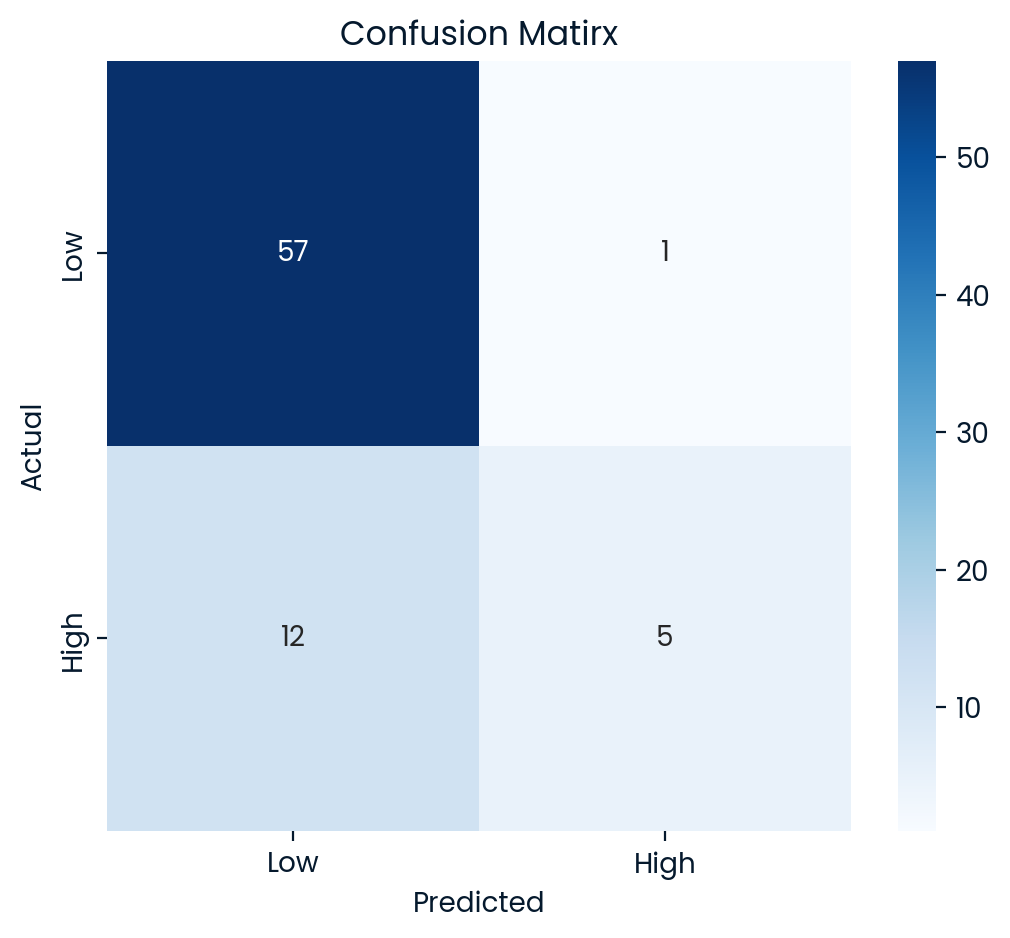

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot = True, fmt="d", cmap="Blues", xticklabels=["Low","High"], yticklabels=["Low","High"]) 
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matirx")
plt.show()

## Conclusion

In this project, we built a **baseline Logistic Regression model** to predict high student test participation in NYC public schools based on test scores, location, and building information. The model achieved an **accuracy of 82.67%**, but the **F1-score for high participation schools was only 0.43**, revealing a challenge in correctly identifying these cases.

From an educational analytics perspective, this means that while the model performs well in detecting low participation schools, it struggles to capture the characteristics of high participation ones. This limitation could be due to class **imbalance** (fewer high participation examples), missing contextual features (e.g., socioeconomic data, parental engagement), and the linear nature of Logistic Regression.

Key Learnings:

- _Data preprocessing_ (handling missing values, encoding categorical variables, and scaling) is essential for building a robust baseline.
- _Class imbalance_ has a significant effect on recall and F1-score for minority classes. 
- Even simple models like Logistic Regression can perform well on accuracy but fail to capture more nuanced class patterns.
  

## Next Steps

If predicting high participation accurately is important, we may need:

- Address class imbalance with resampling.
- Experiment with tree-based models for improved recall.
- Engineer additional features (e.g., socioeconomic data, attendance rates).